# Let us present some model dynamics.

In [1]:
#!/usr/bin/env python3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy.special import stdtrit

# Import the data
if sys.platform == 'darwin':
    df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/code/rundata/run_data.csv")

# Atomicity of investors

When investors have no influence on the funds' wealth and return (```wealth_reset = True```):
* The significance of the investors' decision making increases with their time horizon H. Long horizons identify differences of many standard deviations between the funds (strategies).
* Investment ratios converge to fixed attractors.

When investors have influence on the funds' wealth and return (```wealth_reset = False```):
* The positive relationship between significance and time horizon H is broken. There are standard deviations of difference at very low time horizons (daily to weekly). 
* At longer (yearly) horizons, there is often no statistically significant difference identified among the strategies. 
* For low values of H, the system coordinates tend to be more interior 
* We observe cyclic behavior in investment flows.

More questions
* Are the cycles lengths connected to H?

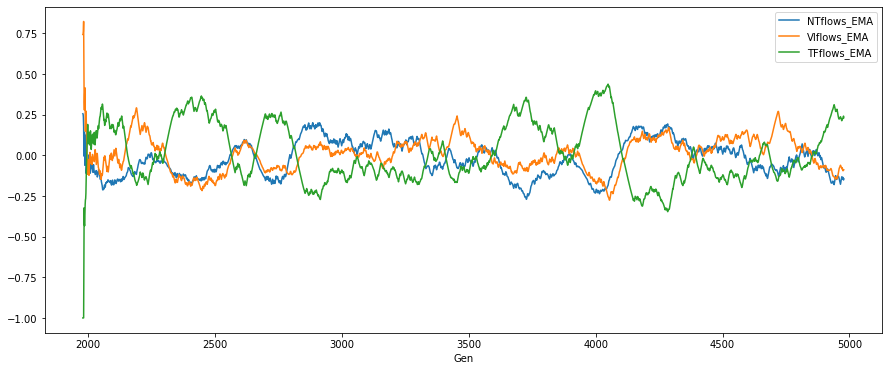

In [3]:
span = 252

df['NTflows_EMA'] = pd.Series.ewm(df['NTflows'].tail(3000), span=span).mean()
df['VIflows_EMA'] = pd.Series.ewm(df['VIflows'].tail(3000), span=span).mean()
df['TFflows_EMA'] = pd.Series.ewm(df['TFflows'].tail(3000), span=span).mean()

df.plot(x="Gen", y = ["NTflows_EMA", "VIflows_EMA", "TFflows_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

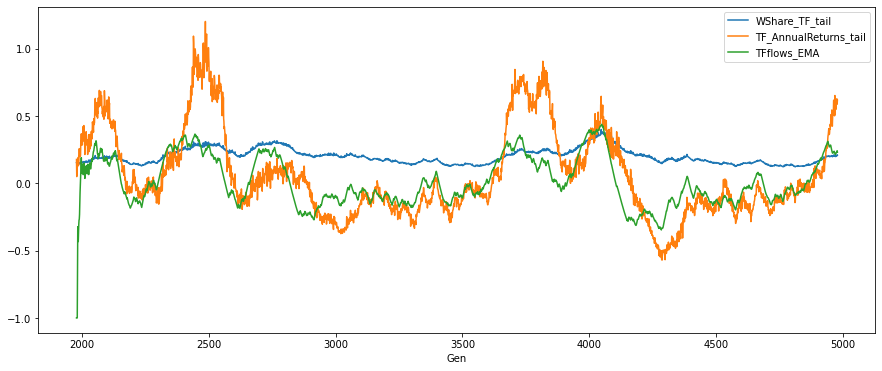

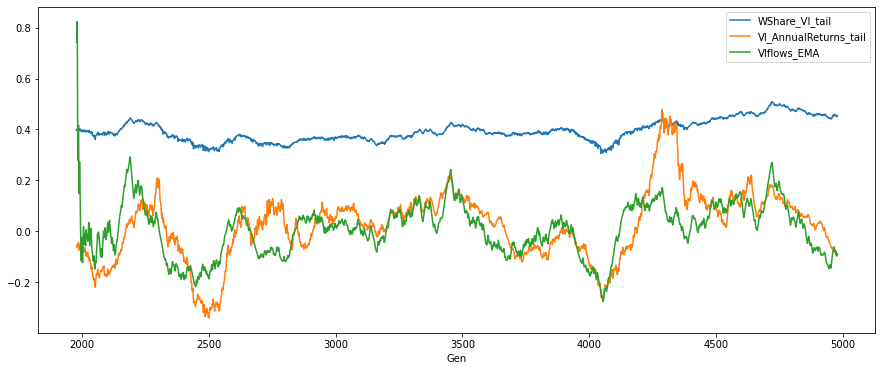

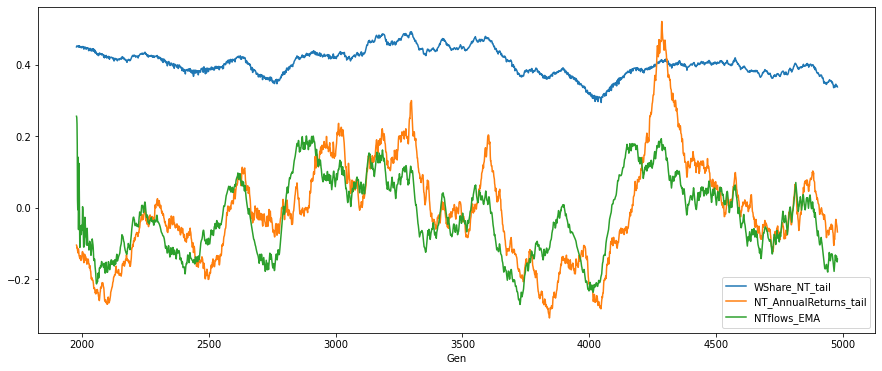

In [13]:
''' What relationship between returns, wealth shares and investment flows? '''

df['TF_AnnualReturns_tail'] = df['TF_AnnualReturns'].tail(3000)
df['VI_AnnualReturns_tail'] = df['VI_AnnualReturns'].tail(3000)
df['NT_AnnualReturns_tail'] = df['NT_AnnualReturns'].tail(3000)
df['WShare_TF_tail'] = df['WShare_TF'].tail(3000) / 100
df['WShare_VI_tail'] = df['WShare_VI'].tail(3000) / 100
df['WShare_NT_tail'] = df['WShare_NT'].tail(3000) / 100

df.plot(x="Gen", y = ["WShare_TF_tail", "TF_AnnualReturns_tail", "TFflows_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_VI_tail", "VI_AnnualReturns_tail", "VIflows_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

df.plot(x="Gen", y = ["WShare_NT_tail", "NT_AnnualReturns_tail", "NTflows_EMA"],
        kind="line", figsize=(15, 6))
plt.show()

# df.plot(x="Gen", y = ["WShare_TF_tail", "TF_AnnualReturns_tail", "VI_AnnualReturns_tail", "NT_AnnualReturns_tail", "TFflows_EMA", "VIflows_EMA", "NTflows_EMA"],
#         kind="line", figsize=(15, 6))
# plt.show()

* Flows seem to be driving annual returns. 
* VI and NT are behaving very similarly, while TF has a very different behavior.

Annual returns are computed over wealth, so they include profits and losses from investment.
Could we show something about returns without investment?